# Setting up

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install umap-learn
import umap

/Users/yijieyin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/yijieyin/.pyenv/versions/3.8.11/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/yijieyin/.pyenv/versions/3.8.11/lib/python3.8/site-packag

### responses

In [2]:
# responses 
res = pd.read_csv('https://raw.githubusercontent.com/samuellab/Larval-ORN/master/Figure2/data/Data%20S1.csv')
res

,Odor,Exp_ID,Concentration,Or33b-47a,Or45a,Or83a,Or35a,Or42a,Or59a,Or1a,...,Or85c,Or13a,Or30a,Or82a,Or22c,Or42b,Or33a,Or49a,Or74a,Or94a-94b
0,1-pentanol,201,1.000000e-08,0.00000,0.02321,0.0,0.052310,0.0,0.0,0.0,...,0.000000,0.018280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-pentanol,201,1.000000e-07,0.08486,-0.08441,0.0,0.513500,0.0,0.0,0.0,...,0.000000,0.104100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1-pentanol,201,1.000000e-06,0.14540,-0.06472,0.0,3.316900,0.0,0.0,0.0,...,0.000000,0.071530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1-pentanol,201,1.000000e-05,0.25370,-0.08251,0.0,6.630400,0.0,0.0,0.0,...,0.000000,0.569200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1-pentanol,201,1.000000e-04,1.37680,0.52230,0.0,6.892000,0.0,0.0,0.0,...,0.000000,4.162000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,nonane,20180429_7,1.000000e-08,0.00000,0.00000,0.0,0.084644,0.0,0.0,0.0,...,0.113684,0.084644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1186,nonane,20180429_7,1.000000e-07,0.00000,0.00000,0.0,0.105023,0.0,0.0,0.0,...,0.143650,0.112488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1187,nonane,20180429_7,1.000000e-06,0.00000,0.00000,0.0,0.259969,0.0,0.0,0.0,...,0.080724,0.087167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,nonane,20180429_7,1.000000e-05,0.00000,0.00000,0.0,0.717280,0.0,0.0,0.0,...,0.084289,0.101265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# take mean for each Odour and Concentration
res_ave = res.groupby(['Odor','Concentration']).mean().reset_index()
# number of odours tested per concentration
res_ave.Concentration.value_counts()

1.000000e-08    34
1.000000e-07    34
1.000000e-06    34
1.000000e-05    34
1.000000e-04    34
1.000000e-11     2
1.000000e-10     2
1.000000e-09     2
Name: Concentration, dtype: int64

In [5]:
# number of concentrations tested for each odour 
res_ave.Odor.value_counts()

2-heptanone                   8
methyl salicylate             8
1-pentanol                    5
linalool                      5
ethyl acetate                 5
ethyl butyrate                5
geranyl acetate               5
hexyl acetate                 5
isoamyl acetate               5
methyl phenyl sulfide         5
menthol                       5
benzyl acetate                5
myrtenal                      5
nonane                        5
pentyl acetate                5
trans,trans-2,4-nonadienal    5
butyl acetate                 5
benzaldehyde                  5
2,5-dimethylpyrazine          5
anisole                       5
acetal                        5
6-methyl-5-hepten-2-ol        5
4-phenyl-2-butanol            5
4-methylcyclohexanol          5
4-methyl-5-vinylthiazole      5
4-hexen-3-one                 5
4,5-dimethylthiazole          5
3-pentanol                    5
3-octanol                     5
2-phenyl ethanol              5
2-nonanone                    5
2-methox

### odour origin info 

In [6]:
# this is in Supplement 3 of the paper 
source = pd.read_csv('/Users/yijieyin/Downloads/Si2019_odour_sources.csv')
source.head()

,odorant,function_group,fruit_or_plant_original,valence,origin
0,acetal,acetal,fruit,attractive,fruit
1,nonane,alkane,"plant oils, tomato",NaN,"plant, tomato"
2,ethyl acetate,ester,fruit,attractive,fruit
3,3-pentanol,alcohol,fruit,NaN,fruit
4,geranyl acetate,"ester, prenyl",leaf and plant oil,aversive,"leaf, plant"


In [7]:
res.Odor.isin(source.odorant).value_counts()

True    1190
Name: Odor, dtype: int64

In [8]:
# if I recall correctly, this one didn't elicit any response 
source.odorant[~source.odorant.isin(res.Odor)]

34    pentanoic (valeric) acid
Name: odorant, dtype: object

### odour meta info

In [9]:
# this is here: https://github.com/samuellab/Larval-ORN/blob/master/Figure4/data/Odor_Structure_Descriptors_EDragon.xlsx 
# read a tidier version 
odour_des = pd.read_csv('/Users/yijieyin/Downloads/Odor_Structure_Descriptors_EDragon.csv')
odour_des.MOL_NAME = odour_des.MOL_NAME.str.lower()
odour_des.head()

,No.,MOL_NAME,PUBCHEM_ID,MOL_ID,MW,AMW,Sv,Se,Sp,Ss,...,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,BLTF96,BLTD48,BLTA96,ALOGPS_logP,ALOGPS_logS
0,1,1-pentanol,6276,C5H12O,88.17,4.90,9.10,17.63,10.02,14.00,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37
1,2,3-pentanol,11428,C5H12O,88.17,4.90,9.10,17.63,10.02,14.33,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.22,-0.12
2,3,6-methyl-5-hepten-2-ol,20745,C8H16O,128.24,5.13,13.29,24.40,14.55,20.00,...,0,0,0,0,0,-3.20,-3.34,-3.36,2.29,-1.25
3,4,3-octanol,11527,C8H18O,130.26,4.82,13.89,26.28,15.31,18.83,...,0,0,0,0,0,-3.32,-3.48,-3.50,2.84,-1.91
4,5,trans-3-hexen-1-ol,5284503,C6H12O,100.18,5.27,10.10,18.63,11.02,16.50,...,0,0,0,0,0,-2.62,-2.69,-2.67,1.69,-0.79


In [10]:
odour_des[~odour_des.MOL_NAME.isin(res.Odor)]

,No.,MOL_NAME,PUBCHEM_ID,MOL_ID,MW,AMW,Sv,Se,Sp,Ss,...,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,BLTF96,BLTD48,BLTA96,ALOGPS_logP,ALOGPS_logS
18,19,2-phenylethanol,6054,C8H10O,122.18,6.43,11.5,18.75,12.26,20.67,...,0,0,0,0,0,-3.03,-3.15,-3.15,1.51,-1.03
31,32,(1r)-(-)-myrtenal,61130,C10H14O,150.24,6.01,14.7,24.51,15.78,23.58,...,0,0,0,1,0,-3.30,-3.46,-3.48,3.03,-2.22


In [11]:
odour_des.loc[odour_des.MOL_NAME == '2-phenylethanol','MOL_NAME'] = '2-phenyl ethanol'
odour_des.loc[odour_des.MOL_NAME == '(1r)-(-)-myrtenal', 'MOL_NAME'] = 'myrtenal'

In [12]:
# there are ORNs not recorded for some conditions 
nas = res.groupby(['Odor','Concentration']).apply(lambda group: group.isna().sum())
nas.sum(axis=1)[nas.sum(axis=1)>0]

Odor               Concentration
2-heptanone        1.000000e-11     100
                   1.000000e-10     100
                   1.000000e-09     100
                   1.000000e-08     106
                   1.000000e-07     106
                   1.000000e-06       6
                   1.000000e-05       6
                   1.000000e-04       6
hexyl acetate      1.000000e-08     144
                   1.000000e-07     144
                   1.000000e-06     144
                   1.000000e-05     144
                   1.000000e-04     144
methyl salicylate  1.000000e-11     120
                   1.000000e-10     120
                   1.000000e-09     120
                   1.000000e-08     126
                   1.000000e-07     126
                   1.000000e-06       6
                   1.000000e-05       6
                   1.000000e-04       6
dtype: int64

In [13]:
# remove rows with any NaN in them 
res_nona = res.dropna()
res_data = res_nona.drop(['Odor','Exp_ID','Concentration'], axis = 1)

In [14]:
res_data.shape

(1015, 21)

In [15]:
# UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(res_data.values)
embedding.shape

(1015, 2)

In [16]:
# add meta information to the embeddings 
meta = pd.DataFrame(embedding, columns = ['x','y'])
meta['odour'] = res_nona.Odor.values
meta['concentration'] = res_nona.Concentration.values
meta = meta.merge(source, left_on = 'odour', right_on='odorant')\
.merge(odour_des, left_on = 'odour', right_on = 'MOL_NAME')
meta.head()

,x,y,odour,concentration,odorant,function_group,fruit_or_plant_original,valence,origin,No.,...,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,BLTF96,BLTD48,BLTA96,ALOGPS_logP,ALOGPS_logS
0,5.477800,13.261399,1-pentanol,1.000000e-08,1-pentanol,alcohol,fruit,attractive,fruit,1,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37
1,6.629334,10.721561,1-pentanol,1.000000e-07,1-pentanol,alcohol,fruit,attractive,fruit,1,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37
2,4.857609,6.974947,1-pentanol,1.000000e-06,1-pentanol,alcohol,fruit,attractive,fruit,1,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37
3,4.435735,6.520353,1-pentanol,1.000000e-05,1-pentanol,alcohol,fruit,attractive,fruit,1,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37
4,3.869632,6.349901,1-pentanol,1.000000e-04,1-pentanol,alcohol,fruit,attractive,fruit,1,...,0,0,0,0,0,-2.42,-2.47,-2.44,1.47,-0.37


<AxesSubplot:xlabel='x', ylabel='y'>

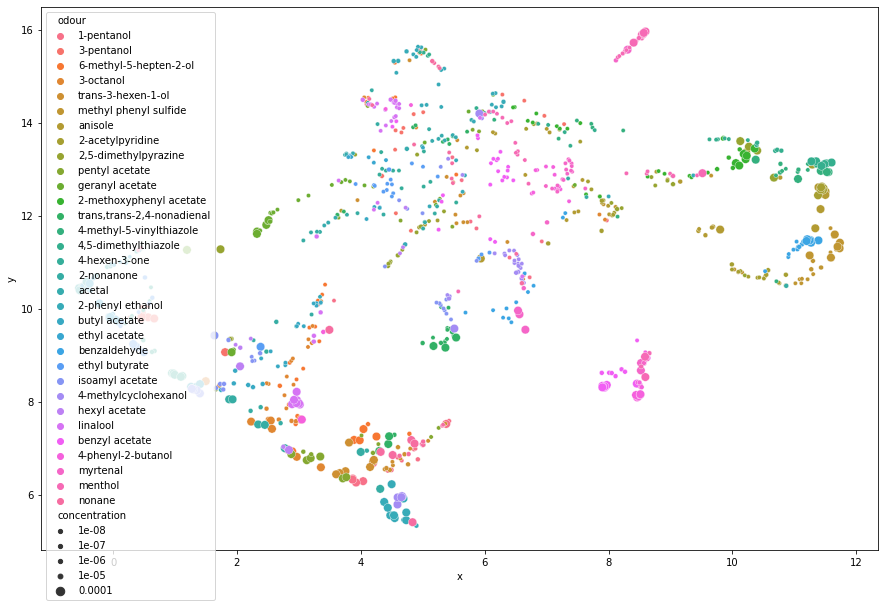

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'odour', size = 'concentration')

<AxesSubplot:xlabel='x', ylabel='y'>

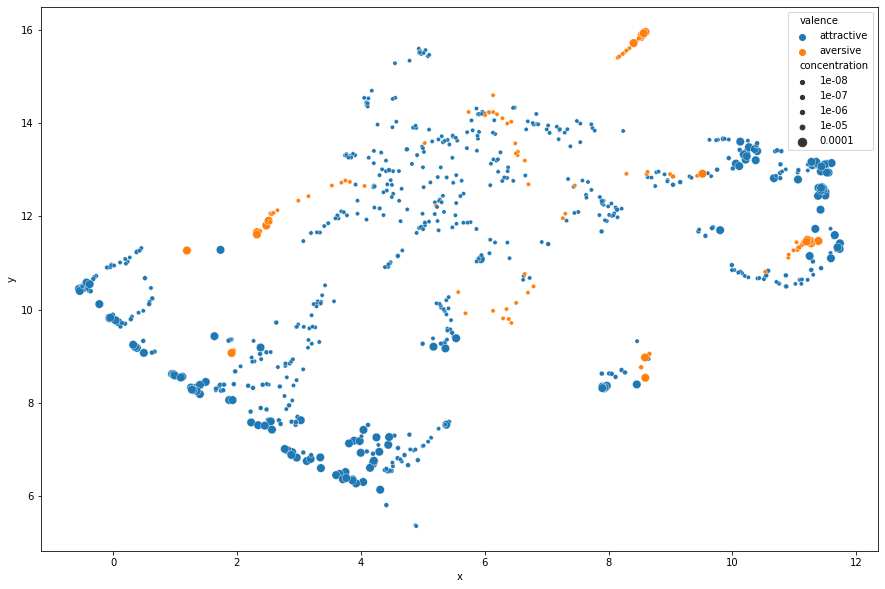

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'valence', size = 'concentration')

There doesn't seem to be a clear relationship between odour valence and ORN response profiles. 

<AxesSubplot:xlabel='x', ylabel='y'>

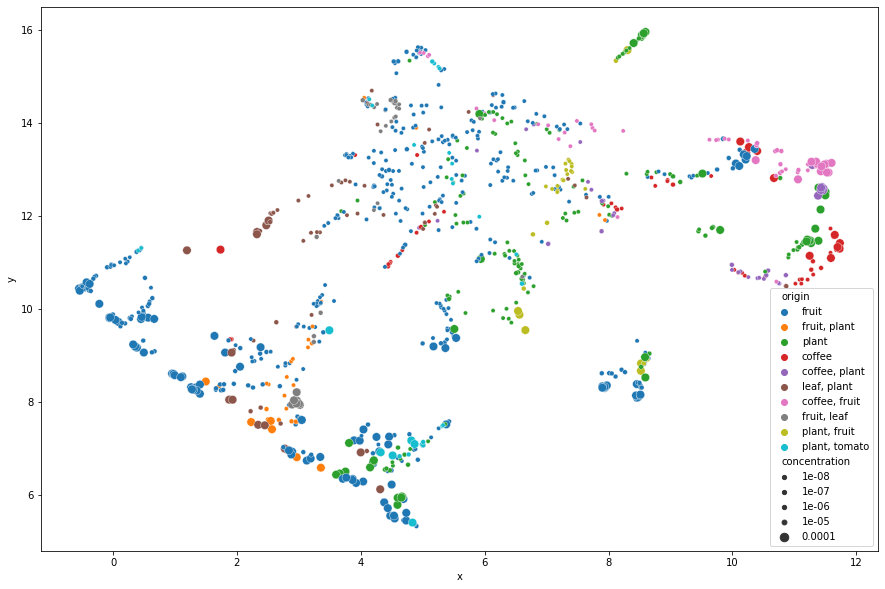

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'origin', size = 'concentration')

No crystal clear relationship between ORN responses and the source of odour, except that the fruity ones more or less form a cluster, and the coffee/plant related ones more or less form another. 

<AxesSubplot:xlabel='x', ylabel='y'>

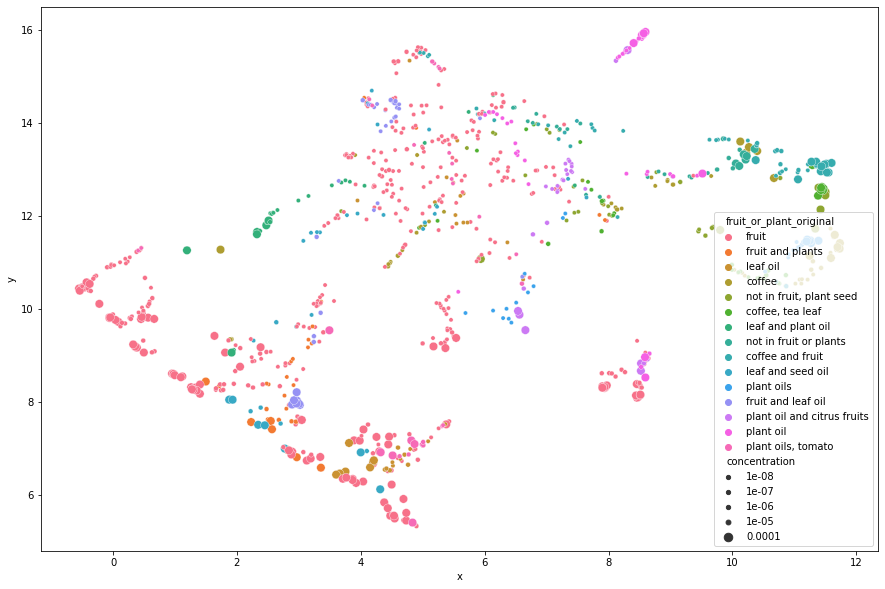

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'fruit_or_plant_original', size = 'concentration')

<AxesSubplot:xlabel='x', ylabel='y'>

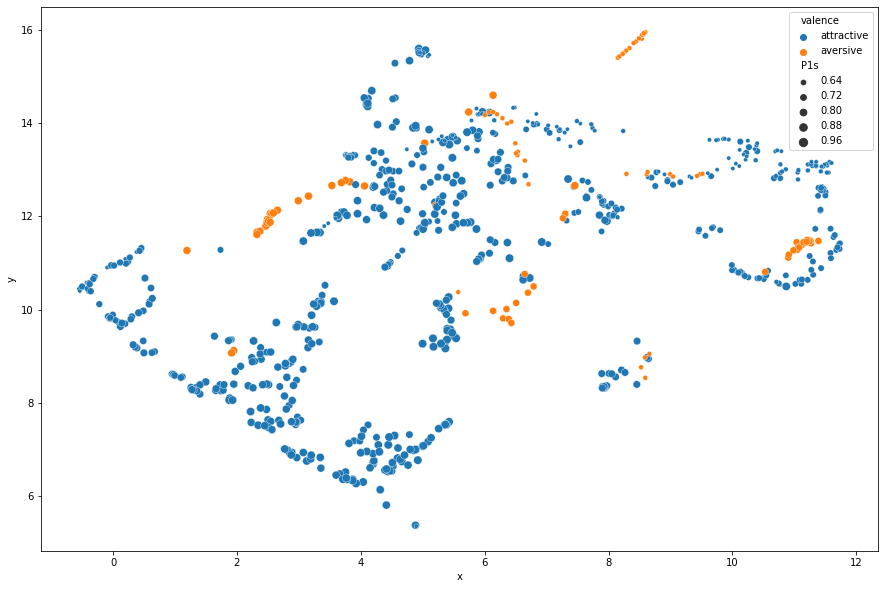

In [54]:
# does the P1s chemical descriptor relate to the valence? 
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'valence', size = 'P1s')

## chemical feature exploration
The aim of this exercise is to see, in addition to the "P1s" noted in the paper, whether there are more chemical features of odours that describe the variation in ORN firing. 

In [21]:
# calculate correlation between embedding columns and chemical feature columns 
corres = meta.drop(list(source.columns) + ['odour','concentration','No.', 'MOL_NAME', "PUBCHEM_ID",'MOL_ID'], axis = 1).corr()

In [22]:
corres.shape

(1668, 1668)

In [34]:
# top correlations with the x axis 
corres[['x','y']].sort_values('x', ascending=False).iloc[1:15,:]

,x,y
BEHm1,0.707913,0.325451
GNar,0.706305,0.213864
BEHp1,0.703088,0.246389
Mp,0.700896,0.233862
STN,0.693809,0.283770
nCIC,0.682109,0.282888
Mv,0.680418,0.237708
BEHv1,0.680308,0.232078
BEHe1,0.680279,0.279608
piPC04,0.679676,0.284998


In [36]:
# top reverse correlations with the x axis 
corres[['x','y']].sort_values('x').iloc[1:10,:]

,x,y
X2A,-0.683360,-0.348629
J3D,-0.651135,-0.226306
Mor18v,-0.646465,-0.247144
Xindex,-0.640525,-0.171711
Mor18p,-0.631267,-0.246357
Mor18m,-0.613995,-0.276132
J,-0.613634,-0.093084
X4A,-0.603247,-0.220770
MSD,-0.600294,-0.394286


<AxesSubplot:ylabel='Frequency'>

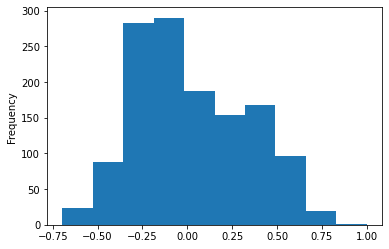

In [25]:
corres.x.plot.hist()

<AxesSubplot:ylabel='Frequency'>

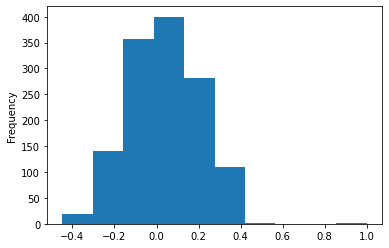

In [31]:
corres.y.plot.hist()

In [38]:
# top correlations with the y axis 
corres[['x','y']].sort_values('y', ascending=False).iloc[1:10,:]

,x,y
L2s,0.352353,0.430876
P2s,0.411058,0.424997
L2m,0.424117,0.415589
P2m,0.487211,0.401860
L2e,0.448612,0.388159
L2u,0.442352,0.379710
QXXm,0.360656,0.376665
L2v,0.403311,0.375457
PW3,0.624945,0.373483


In [55]:
# top reverse correlations with the y axis 
corres[['x','y']].sort_values('y').iloc[1:10,:]

,x,y
P1s,-0.421828,-0.446020
Km,-0.472757,-0.421281
ASP,-0.463853,-0.419810
P1m,-0.468779,-0.416519
MSD,-0.600294,-0.394286
P1e,-0.457699,-0.367960
P1v,-0.482218,-0.364794
Ke,-0.459743,-0.359662
P1u,-0.460022,-0.359143


<AxesSubplot:xlabel='x', ylabel='y'>

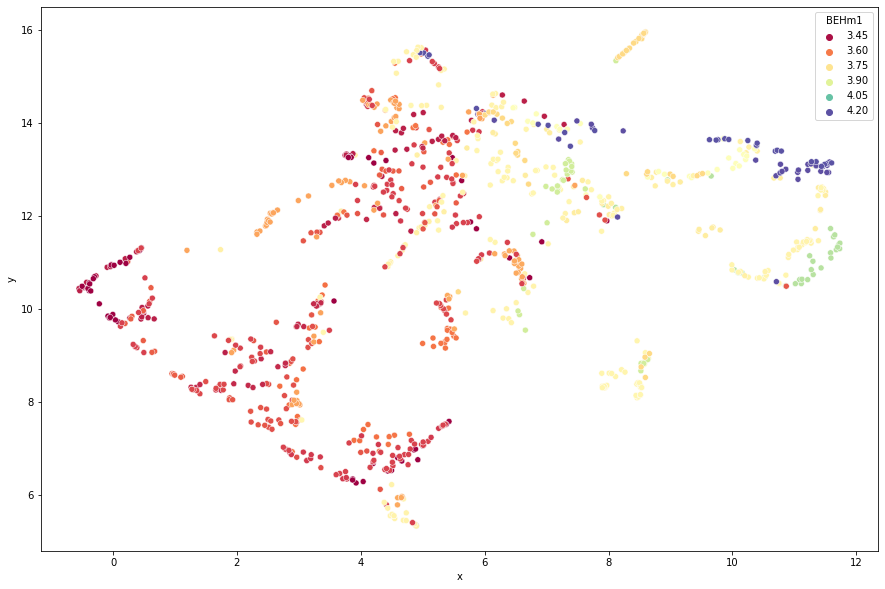

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = meta, x = 'x', y = 'y', 
                hue = 'BEHm1', palette="Spectral")

In [40]:
# descriptors I'm interested in based on the sorting above 
des = ['BEHm1', 'GNar', 'BEHp1', 'Mp', 'STN', 'nCIC', 'Mv', 'BEHv1', 'BEHe1', 'piPC04', 'HNar', 'piPC05', 'VRv2', 'VRp2', 'X2A', 'J3D', 'Mor18v', 'Xindex', 'Mor18p', 'Mor18m', 'J', 'X4A', 'MSD', 'L2s', 'P2s', 'L2m', 'P2m', 'L2e', 'L2u', 'QXXm', 'L2v', 'PW3', 'P1s', 'Km', 'ASP', 'P1m', 'MSD', 'P1e', 'P1v', 'Ke', 'P1u']

In [42]:
des_mat = corres.loc[des,des]

In [43]:
des_reducer = umap.UMAP()
des_embedding = des_reducer.fit_transform(des_mat.values)

In [45]:
des_meta = pd.DataFrame(des_embedding, columns = ['x','y'])
des_meta['descriptor'] = des_mat.index.values

In [46]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [49]:
datasource = ColumnDataSource(des_meta) 
plot_figure = figure(
    title="UMAP of descriptors' correlation for 34 odours",
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 18px'>@descriptor</span>
    </div>
</div>
"""))


plot_figure.circle(
    'x',
    'y',
    source=datasource,
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

Based on this we only need to look at some descriptors instead of all. 